In [3]:
import pandas as pd

data = pd.read_csv('C:\\Users\\atefe\\Desktop\\S&P 500 stock data\\all_stocks_5yr.csv')
# Check the first few rows of the dataframe
print(data.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [4]:
data.describe()  # Get summary statistics
data.info()      # Get info on column data types and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [6]:
print(data.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


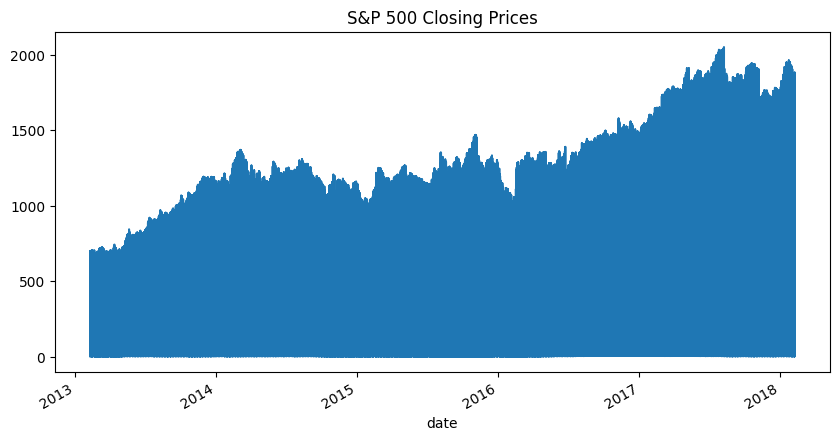

In [8]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime and set as index (if not already set)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Plotting the closing prices over time
data['close'].plot(figsize=(10, 5))
plt.title('S&P 500 Closing Prices')
plt.show()



In [9]:
X = data[['open']]  # Independent variable
y = data['close']  # Dependent variable (target)


###
In the context of stock market data, the "close" refers to the closing price of a stock on a given trading day. It is the last price at which a stock trades during the regular trading hours. The closing price is significant because it is the most definitive price of the day, reflecting the final consensus of value for that day among all market participants. It's used as a standard benchmark by investors to track the performance of a stock from one day to the next.
In predictive modeling for stocks, using the closing price as the target variable helps in developing models that aim to forecast what the closing price will be at the end of a future trading day based on past performance and other factors. This is essential for traders and analysts who base their strategies on predicting how the stock will perform.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Check for NaN values in the dataset
print(data.isnull().sum())


open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [14]:
print(data.dtypes)


open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


In [15]:
# Drop the 'Name' column
data = data.drop(columns=['Name'])


In [16]:
# Fill NaN values with the mean of each column
data.fillna(data.mean(), inplace=True)


In [17]:
# Check for NaN values again
print(data.isnull().sum())


open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [18]:
# Define features and target variable
X = data[['open']]  # Independent variable
y = data['close']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)


R^2 Score: 0.9995666328478422
Mean Squared Error: 4.061682139064813


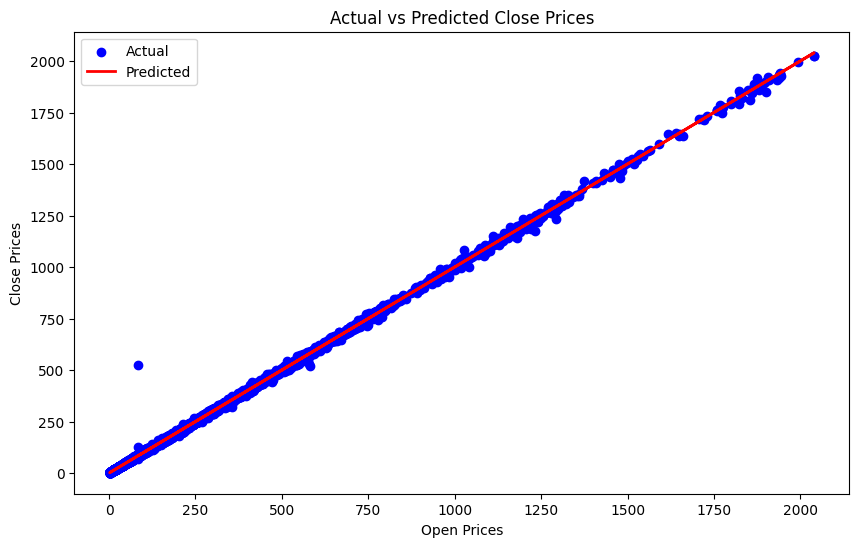

In [21]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Open Prices')
plt.ylabel('Close Prices')
plt.legend()
plt.show()


In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSEs:", -scores)
print("Average MSE:", -scores.mean())


Cross-validated MSEs: [3.04056529 1.53611834 2.0918656  5.91388303 1.219826  ]
Average MSE: 2.760451649966609


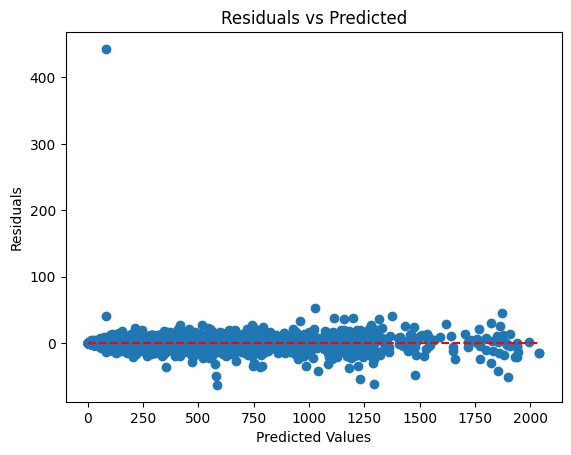

In [23]:
# Calculate residuals Checking the residuals (the differences between the observed and predicted values) can help diagnose issues with the model, such as non-linearity or heteroscedasticit
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [25]:
import numpy as np
# Find the largest residuals
outlier_indices = np.where(abs(residuals) > np.percentile(abs(residuals), 95))[0]
outlier_values = X_test.iloc[outlier_indices]

# Examine outlier values
print("Outliers in the dataset:")
print(data.loc[outlier_values.index])


Outliers in the dataset:
              open     high     low   close    volume
date                                                 
2016-12-08   48.60   48.600   47.70   48.05   6239952
2016-12-08  110.86  112.430  110.60  112.12  27068316
2016-12-08  176.41  177.830  175.18  176.52    796781
2016-12-08   60.02   60.980   59.09   60.90   9192264
2016-12-08   76.24   77.640   75.68   76.88   2567162
...            ...      ...     ...     ...       ...
2013-06-12   27.48   27.480   26.96   27.01    834388
2013-06-12   71.84   72.670   71.42   71.70   3452002
2013-06-12   78.05   78.050   76.87   77.01   1028910
2013-06-12   28.04   28.085   26.95   27.14   2049091
2013-06-12   31.95   32.030   31.40   31.53   7648422

[3056972 rows x 5 columns]


In [26]:
import numpy as np

# Define a threshold for identifying outliers (e.g., 95th percentile of residuals)
threshold = np.percentile(abs(residuals), 95)

# Find the indices of outliers
outlier_indices = np.where(abs(residuals) > threshold)[0]

# Print the number of outliers
print("Number of outliers detected:", len(outlier_indices))

# Remove outliers from the dataset
clean_X_test = X_test.drop(X_test.index[outlier_indices])
clean_y_test = y_test.drop(y_test.index[outlier_indices])

# Refit the model without outliers
model.fit(X_train, y_train)

# Make predictions on the cleaned test set
clean_y_pred = model.predict(clean_X_test)

# Evaluate the model performance without outliers
clean_r2 = r2_score(clean_y_test, clean_y_pred)
clean_mse = mean_squared_error(clean_y_test, clean_y_pred)

print("R^2 Score without outliers:", clean_r2)
print("Mean Squared Error without outliers:", clean_mse)


Number of outliers detected: 6191
R^2 Score without outliers: 0.9998667604395625
Mean Squared Error without outliers: 0.3564094413292893


In [27]:
from sklearn.linear_model import Ridge

# Create and fit the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("R^2 Score (Ridge):", r2_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)


R^2 Score (Ridge): 0.9995666328480284
Mean Squared Error (Ridge): 4.061682137320486


In [28]:
from sklearn.linear_model import Lasso

# Create and fit the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("R^2 Score (Lasso):", r2_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)


R^2 Score (Lasso): 0.9995667139486017
Mean Squared Error (Lasso): 4.06092203183255
